In [21]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [22]:
import pandas as pd
from matplotlib_venn import venn3, venn2
pd.options.display.max_rows = 2000

In [33]:
pd.options.display.max_colwidth = 120

In [34]:
df = pd.read_csv("out/df_subtract_norm.csv", index_col=0)
df = df[df.sum(1)!=0]  # drop empty rows
df.head()
df.shape

(9237, 6)

In [35]:
# venn where a protein cluster is selected if it is in >=1 sample per group
df['unenriched'] = df['unenriched1'] + df['unenriched2'] + df['unenriched3']
df['vk'] = df['vk1'] + df['vk2'] + df['vk3']
df.head()

,unenriched1,unenriched2,unenriched3,vk1,vk2,vk3,unenriched,vk
86769,11.903749,12.929856,14.373451,0.000000,0.000000,0.000000,39.207057,0.000000
202956,13.226388,14.869335,18.480152,20.266570,19.850757,21.220320,46.575875,61.337646
209005,25.791456,22.627249,27.378003,9.692707,18.747937,0.000000,75.796708,28.440644
318873,15.210346,18.101799,20.533502,14.098483,17.645117,14.854224,53.845647,46.597824
374028,13.226388,10.343885,12.320101,0.000000,0.000000,0.000000,35.890374,0.000000


In [36]:
df[df.vk==0].shape

(1922, 8)

In [37]:
unenriched = set(df[df['unenriched']>0].index)
vk = set(df[df['vk']>0].index)

In [38]:
locus_df = pd.read_csv("out/locus_df.csv", index_col=0)
locus_df.head(2)

,gn,gn1,human_mouse,lca,name
86769,CP,CP,False,12234.0,sp|P03576|CAPSD_TOML Capsid protein OS=Tomato mosaic virus (strain L) GN=CP PE=3 SV=2
202956,NaN,NaN,False,147545.0,gi|115398299|ref|XP_001214741.1| NADP-specific glutamate dehydrogenase [Aspergillus terreus NIH2624]


In [39]:
not_in_vk = unenriched - vk
not_in_unenriched = vk - unenriched

In [40]:
# not_in_vk
locus_df[locus_df.index.isin(not_in_vk)]

,gn,gn1,human_mouse,lca,name
86769,CP,CP,False,12234.0,sp|P03576|CAPSD_TOML Capsid protein OS=Tomato mosaic virus (strain L) GN=CP PE=3 SV=2
374028,NaN,NaN,False,4893.0,gi|255711186|ref|XP_002551876.1| KLTH0B01958p [Lachancea thermotolerans]
496339,NaN,NaN,False,336963.0,gi|258570103|ref|XP_002543855.1| translation elongation factor Tu [Uncinocarpus reesii 1704]
507999,NaN,NaN,False,147545.0,gi|629635120|ref|XP_007786206.1| Elongation factor Tu [Endocarpon pusillum Z07020]
2078088,NaN,NaN,False,1257118.0,gi|470521543|ref|XP_004353733.1| Inosine5'-monophosphate dehydrogenase [Acanthamoeba castellanii str. Neff]
2154348,NaN,NaN,False,35688.0,gi|568247768|ref|YP_008965811.1| translation elongation factor Ts (chloroplast) [Porphyridium purpureum]
2287574,NaN,NaN,False,NaN,V1.UC59-0_GL0047198 [gene] locus=scaffold34525_1:2:625:- [Lack both ends] codon-table.11
2559454,guaB,guaB,False,67760.0,gi|502865602|ref|WP_013100578.1| inosine 5'-monophosphate dehydrogenase [Methanocaldococcus infernus]
2637551,NaN,NaN,False,1088740.0,gi|494813971|ref|WP_007549379.1| S-adenosylmethionine synthetase [Candidatus Nitrosoarchaeum koreensis]
3650534,c4532,c4532,False,562.0,gi|26250352|ref|NP_756392.1| hypothetical protein c4532 [Escherichia coli CFT073]


In [41]:
# not_in_unenriched
locus_df[locus_df.index.isin(not_in_unenriched)]

,gn,gn1,human_mouse,lca,name
733338,NaN,NaN,False,28901.0,"gi|487585773|ref|WP_001724780.1| glyceraldehyde-3-phosphate dehydrogenase A, partial [Salmonella enterica]"
2114380,NaN,NaN,False,632.0,gi|488289440|ref|WP_002360648.1| aconitate hydratase [Yersinia pestis]
2478382,NaN,NaN,False,28901.0,"gi|446363992|ref|WP_000441847.1| hypothetical protein, partial [Salmonella enterica]"
3675519,rpsE,rpsE,False,1236.0,gi|551324509|ref|WP_022943952.1| 30S ribosomal protein S5 [Pseudoalteromonas ruthenica]
3740901,"sucA,T2140",NaN,False,1236.0,"gi|565850321|ref|WP_023933003.1| oxoglutarate dehydrogenase (succinyl-transferring), E1 component [Photobacterium le..."
4543087,NaN,NaN,False,615.0,gi|515496777|ref|WP_016930031.1| phosphoglycerate kinase [Serratia marcescens]
4557438,NaN,NaN,False,58050.0,gi|518272287|ref|WP_019442495.1| F0F1 ATP synthase subunit alpha [Moritella marina]
4737878,"AV34_03920,SerAS9_1239,AV78_03940,AV26_03930,AU72_03925,AV29_03925,AV56_03925,YE105_C1296,SPAB_02798,AU96_03940,KPHS...",NaN,False,131567.0,gi|518283828|ref|WP_019454036.1| 2-oxoglutarate dehydrogenase E1 [Serratia marcescens]
5518117,"sucC,BN643_01824,MU9_1388",NaN,False,131567.0,gi|495259828|ref|WP_007984583.1| malate--CoA ligase subunit beta [Pseudomonas sp. GM48]
5730052,"J415_05350,fusA1,fusA2,fusA,CF65_00564",NaN,False,1236.0,gi|27904945|ref|NP_778071.1| elongation factor G [Buchnera aphidicola str. Bp (Baizongia pistaciae)]


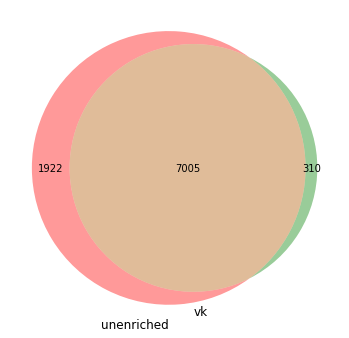

In [42]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn2([unenriched,vk], ["unenriched", "vk"])

In [43]:
unenriched1 = set(df[df['unenriched1']>0].index)
unenriched2 = set(df[df['unenriched2']>0].index)
unenriched3 = set(df[df['unenriched3']>0].index)

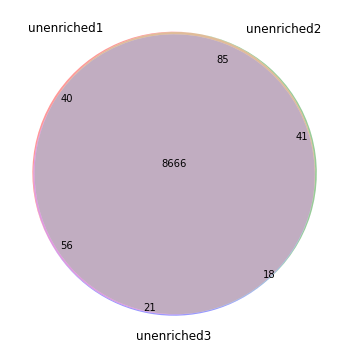

In [44]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn3([unenriched1,unenriched2,unenriched3], ["unenriched1", "unenriched2", "unenriched3"])

In [45]:
vk1 = set(df[df['vk1']>0].index)
vk2 = set(df[df['vk2']>0].index)
vk3 = set(df[df['vk3']>0].index)

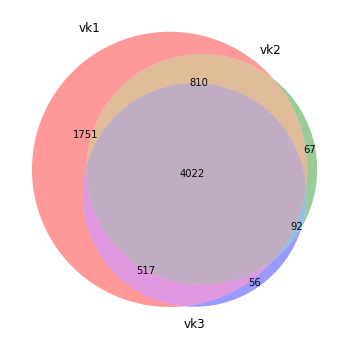

In [46]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn3([vk1,vk2,vk3], ["vk1", "vk2", "vk3"])